# Load Data from CSVs

In [27]:
import unicodecsv as csv

def read_csv(csvfile):
    with open(csvfile, 'rb') as f:
        reader = csv.DictReader(f)
        return list(reader)
daily_engagement = read_csv('C:/Users/Varun Kumar/data_analyst/intro_to_data_analysis/Lesson1/daily_engagement.csv')
project_submissions = read_csv('C:/Users/Varun Kumar/data_analyst/intro_to_data_analysis/Lesson1/project_submissions.csv')
enrollments = read_csv('C:/Users/Varun Kumar/data_analyst/intro_to_data_analysis/Lesson1/enrollments.csv')

In [28]:
print(daily_engagement[0])
print('----------')
print(project_submissions[0])
print('----------')
print(enrollments[0])

{'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'lessons_completed': '0.0', 'projects_completed': '0.0'}
----------
{'creation_date': '2015-01-14', 'completion_date': '2015-01-16', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}
----------
{'account_key': '448', 'status': 'canceled', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'days_to_cancel': '65', 'is_udacity': 'True', 'is_canceled': 'True'}


# Fixing Data Types

In [29]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [30]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [31]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

# Problems in the Dataset

In [32]:
## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

# Investigating the Dataset

In [33]:
## Find the total number of rows and the number of unique students (account keys)
## in each table.

def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])

    return unique_students

print(len(enrollments))
print(len(daily_engagement))
print(len(project_submissions))
print('----------')
print(len(get_unique_students(enrollments)))
print(len(get_unique_students(daily_engagement)))
print(len(get_unique_students(project_submissions)))

1640
136240
3642
----------
1302
1237
743


# Missing Engagement Records

In [34]:
## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

unique_engagement_students = get_unique_students(daily_engagement)

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)
        break

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


# Checking for More Problem Records

In [35]:
## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        num_problem_students += 1
        print(enrollment)
num_problem_students

{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}


3

# Tracking Down the Remaining Problems

In [36]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [37]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [38]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


# Explore Data
## Refining the Question

In [39]:
## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']

        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date

len(paid_students)

995

## Getting Data from First Week

In [40]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

In [41]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [42]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

21508

# Exploring Student Engagement

In [43]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [44]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [45]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 647.5901738262695
Standard deviation: 1129.2712104188108
Minimum: 0.0
Maximum: 10568.100867332541


# Debugging Data Analysis Code

In [46]:
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

problem_time = 0
problem_student = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > problem_time:
        problem_time = total_minutes
        problem_student = student
print(problem_time)
print(problem_student)

10568.100867332541
108


In [47]:
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        delta = engagement_record['utc_date'] - paid_students[account_key]
        if delta.days >= 0:
            total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

total_minutes = list(total_minutes_by_account.values())
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


# Lessons Completed In First Week

In [48]:
## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
def find_total(data, key):
    total_by_account = {}
    for account_key, engagement_for_student in data.items():
        total = 0
        for engagement_record in engagement_for_student:
            delta = engagement_record['utc_date'] - paid_students[account_key]
            if delta.days >= 0:
                total += engagement_record[key]
        total_by_account[account_key] = total
    return total_by_account

total_lessons_by_account = find_total(engagement_by_account,'lessons_completed')
total_lessons = list(total_lessons_by_account.values())
print('Mean:', np.mean(total_lessons))
print('Standard deviation:', np.std(total_lessons))
print('Minimum:', np.min(total_lessons))
print('Maximum:', np.max(total_lessons))

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


# Number of visits in First Week

In [49]:
## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for engagement in non_udacity_engagement:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0
        
total_days_by_account = find_total(engagement_by_account, 'has_visited')
total_days = list(total_days_by_account.values())
print('Mean:', np.mean(total_days))
print('Standard deviation:', np.std(total_days))
print('Minimum:', np.min(total_days))
print('Maximum:', np.max(total_days))

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


# Splitting out Passing Students

In [50]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

passed_student = set()
for submission in paid_submissions:
    rating = submission['assigned_rating']
    lesson = submission['lesson_key']
    student = submission['account_key']
    if lesson in subway_project_lesson_keys and rating in ['PASSED', 'DISTINCTION']:
        passed_student.add(student)
        
for engagement in paid_engagement_in_first_week:
    student = engagement['account_key']
    if student in passed_student:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print(len(passed_student))
print(len(passing_engagement))
print(len(non_passing_engagement))

647
15231
6277


# Comparing the Two Student Groups

In [51]:
## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

def group_data(data):
    data_by_account = defaultdict(list)
    for data_point in data:
        account_key = data_point['account_key']
        data_by_account[account_key].append(data_point)
    return data_by_account

passing_engagement_by_account = group_data(passing_engagement)
non_passing_engagement_by_account = group_data(non_passing_engagement)

def print_statistics(data, key):
    total_data_by_account = find_total(data, key)
    total = list(total_data_by_account.values())
    print('Mean:', np.mean(total))
    print('Standard deviation:', np.std(total))
    print('Minimum:', np.min(total))
    print('Maximum:', np.max(total))

print("===Passing Engagement===")
print_statistics(passing_engagement_by_account, 'total_minutes_visited')
print("===Non Passing Engagement===")
print_statistics(non_passing_engagement_by_account, 'total_minutes_visited')

===Passing Engagement===
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
===Non Passing Engagement===
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


# Making Histogram

Populating the interactive namespace from numpy and matplotlib


C:\Users\Varun Kumar\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


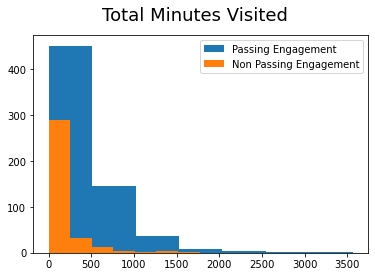

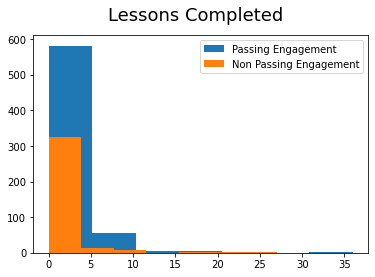

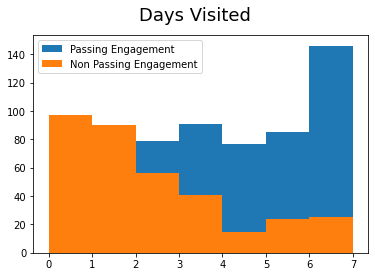

In [52]:
## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
def print_histogram(data, key, label):
    total_data_by_account = find_total(data, key)
    total = total_data_by_account.values()
    plt.hist(total, bins=7, label=label)
    plt.legend()

plt.figure()
plt.suptitle('Total Minutes Visited', fontsize=18)
print_histogram(passing_engagement_by_account, 'total_minutes_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'total_minutes_visited', 'Non Passing Engagement')
plt.figure()
plt.suptitle('Lessons Completed', fontsize=18)
print_histogram(passing_engagement_by_account, 'lessons_completed', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'lessons_completed', 'Non Passing Engagement')
plt.figure()
plt.suptitle('Days Visited', fontsize=18)
print_histogram(passing_engagement_by_account, 'has_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'has_visited', 'Non Passing Engagement')

# Communication Phase

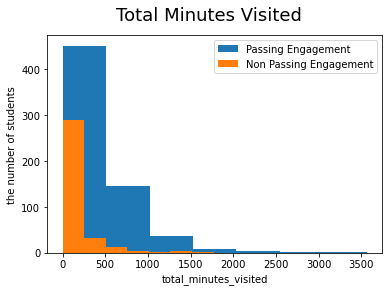

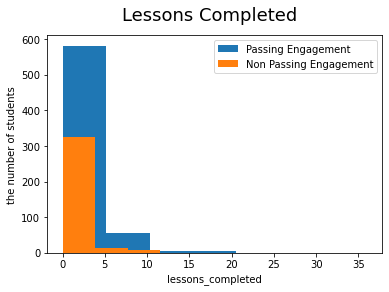

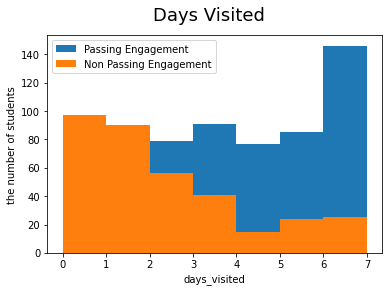

In [53]:
## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

plt.figure()
plt.suptitle('Total Minutes Visited', fontsize=18)
plt.xlabel("total_minutes_visited")
plt.ylabel("the number of students")
print_histogram(passing_engagement_by_account, 'total_minutes_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'total_minutes_visited', 'Non Passing Engagement')

plt.figure()
plt.suptitle('Lessons Completed', fontsize=18)
plt.xlabel("lessons_completed")
plt.ylabel("the number of students")
print_histogram(passing_engagement_by_account, 'lessons_completed', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'lessons_completed', 'Non Passing Engagement')

plt.figure()
plt.suptitle('Days Visited', fontsize=18)
plt.xlabel("days_visited")
plt.ylabel("the number of students")
print_histogram(passing_engagement_by_account, 'has_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'has_visited', 'Non Passing Engagement')